In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt



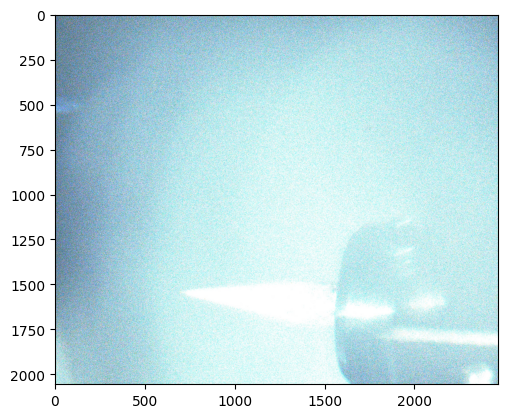

In [11]:
img = cv2.imread('noisy_image_1.jpg')
plt.imshow(img)
plt.show()

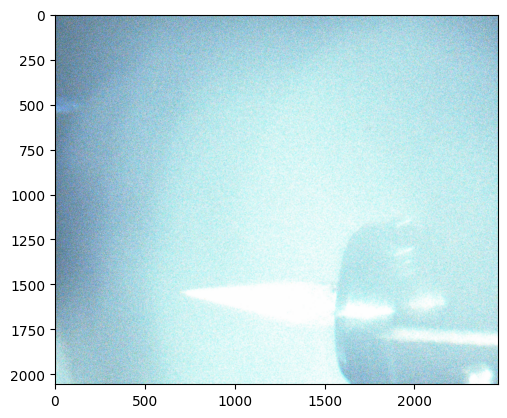

In [12]:


dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 5)

plt.imshow(dst)
plt.show()

In [ ]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 2, 15)



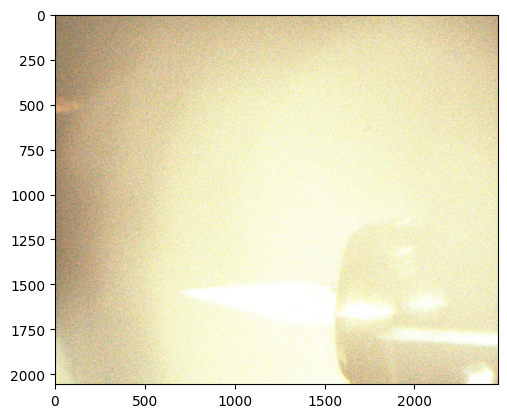

In [14]:
from PIL import Image, ImageFilter
PIL_im:Image = Image.open('noisy_image_1.jpg')
dst_2 = PIL_im.filter(filter=ImageFilter.MedianFilter)

plt.imshow(dst_2)

In [16]:
from PIL import Image, ImageFilter
PIL_im:Image = Image.open('noisy_video.mp4')
dst_3 = PIL_im.filter(filter=ImageFilter.MedianFilter)

plt.imshow(dst_3)

UnidentifiedImageError: cannot identify image file 'C:\\YangLab\\miniMBE-GUI-v2\\noisy_video.mp4'

In [18]:
%pip install git+https://github.com/fbcotter/pytorch_wavelets
%pip install hyde-images
%pip install torch


  Cloning https://github.com/fbcotter/pytorch_wavelets to c:\users\ndian\appdata\local\temp\pip-req-build-0dzv11_l
  Resolved https://github.com/fbcotter/pytorch_wavelets to commit 9a0c507f04f43c5397e384bb6be8340169b2fd9a
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/fbcotter/pytorch_wavelets 'C:\Users\ndian\AppData\Local\Temp\pip-req-build-0dzv11_l'

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import hyde
import torch
import numpy


input_tens = torch.tensor(np.array(PIL_im), dtype=torch.float32, device="cpu")
hyres = hyde.HyRes()
output = hyres(input_tens)


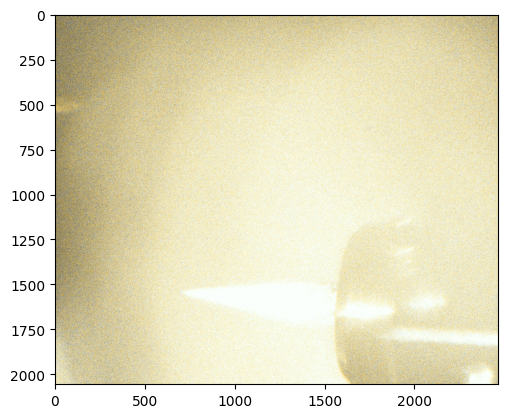

In [24]:
output_np = output.detach().cpu().numpy()
output_np = np.clip(output_np, 0, 255).astype(np.uint8)
plt.imshow(output_np)
plt.show()

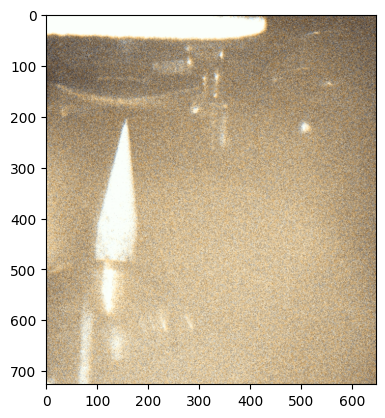

In [25]:


input_tens = torch.tensor(np.array(Image.open('noisy_nozzle_image.png')), dtype=torch.float32, device="cpu")
hyres = hyde.HyRes()
output = hyres(input_tens)

output_np = output.detach().cpu().numpy()
output_np = np.clip(output_np, 0, 255).astype(np.uint8)
plt.imshow(output_np)
plt.show()

In [26]:
def show_tensor_output_as_plt(tensor):
    output_np = tensor.detach().cpu().numpy()
    output_np = np.clip(output_np, 0, 255).astype(np.uint8)
    plt.imshow(output_np)
    plt.show()

c:\Users\ndian\AppData\Local\Programs\Python\Python312\Lib\site-packages\hyde\transform_domain\forpdn.py:155: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4416.)
  sigma = torch.sqrt(torch.var(w.T, dim=0).T)


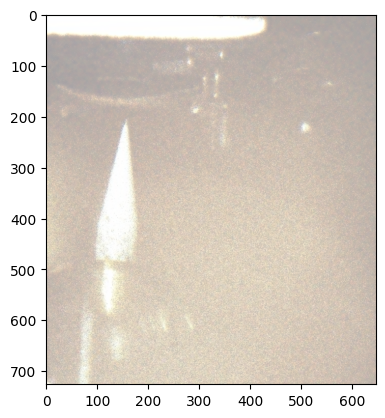

In [28]:
hyNet = hyde.FORPDN_SURE()
show_tensor_output_as_plt(hyNet(input_tens))

In [ ]:
nn_method = hyde.NNInference(arch="memnet",pretrained_file="hyde-bs16-blindSNR-gaussian-memnet-l2.pth")
show_tensor_output_as_plt(nn_method(input_tens))

2025-07-01 16:11 - [ HyDe ][ INFO ] Loading model from: hyde-bs16-blindSNR-gaussian-memnet-l2.pth 	 (call_nn_inference.py:21)


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.